## Introduction

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease

#### Attributes
- age


- sex


- chest pain type (4 values)


- resting blood pressure


- serum cholestoral in mg/dl


- fasting blood sugar > 120 mg/dl


- resting electrocardiographic results (values 0,1,2)


- maximum heart rate achieved


- exercise induced angina


- oldpeak = ST depression induced by exercise relative to rest


- the slope of the peak exercise ST segment


- number of major vessels (0-3) colored by flourosopy


- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


- The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# Read in the data

df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:

df.shape

(303, 14)

In [8]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

## Categorizing cols


In [10]:
Categorical_col = ['sex','cp','fbs','restecg','exng','slp','caa','thall']

Numerical_col = ['age','trtbps','chol','thalachh','oldpeak']

Target_col = ['output']

In [11]:
Numerical_col

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [12]:
df[Numerical_col].describe().transpose()

#Describing the numerical columns 

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Check for missing values

In [13]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Exploratory Data Analysis


## Univariate Analysis

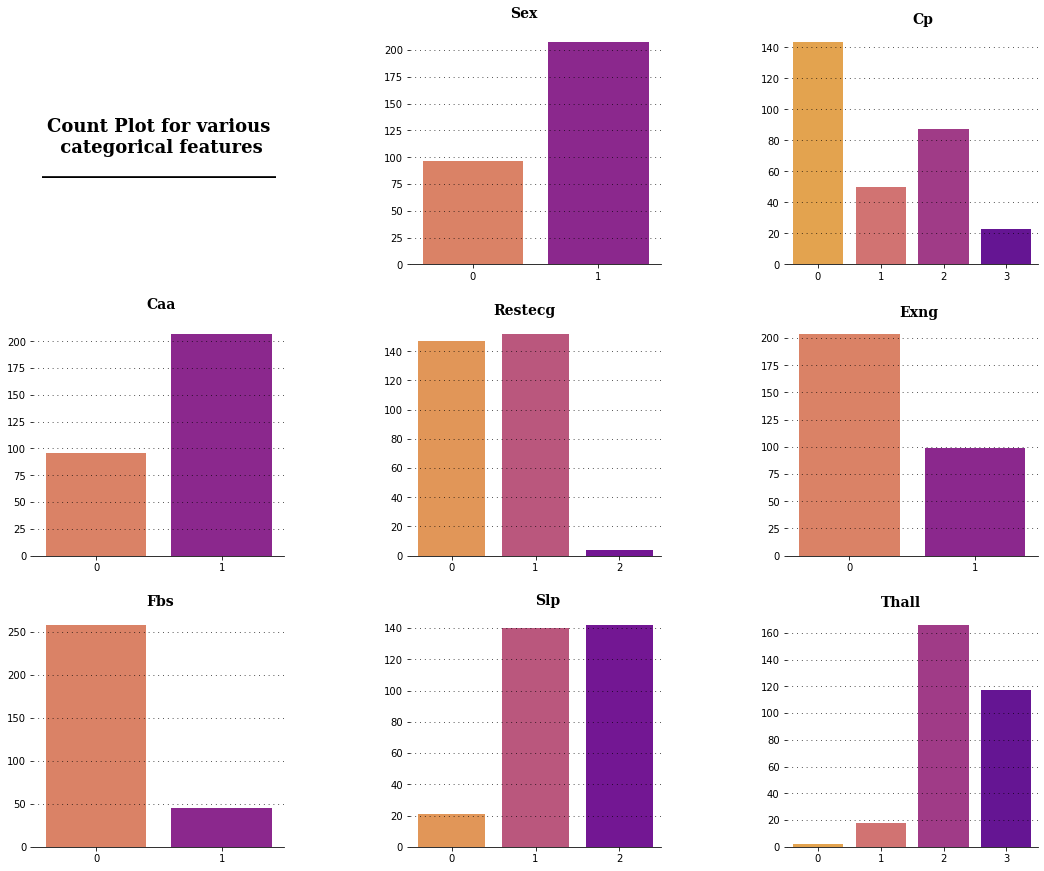

In [70]:
# Make countplot for all categorical cols

#Create a figure
fig = plt.figure(figsize= (18,15))

# Create gridspec on the Fig
gs = fig.add_gridspec(3,3)

# Adding a GridSpec.update for the width and height spaces
gs.update(wspace = 0.5, hspace = 0.25)

# Adding the subplot axes on the grid

ax0 = fig.add_subplot(gs[0,0]) 
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

# Plot title
7887 0ax0.spines['bottom'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0 .5,0.5, 'Count Plot for various\n categorical features\n__________________________',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 18, fontweight = 'bold',
        fontfamily = 'serif')

# Sex countplot
ax1.text(0.3, 230, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x='sex', palette='plasma_r')
ax1.set_xlabel("")
ax1.set_ylabel("")

#CP countplot
ax2.text(1.5, 155, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2, data=df, x='cp', palette='plasma_r')
ax2.set_xlabel("")
ax2.set_ylabel("")

#Caa Count plot
ax3.text(0.4, 230, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3, data=df, x='sex', palette='plasma_r')
ax3.set_xlabel("")
ax3.set_ylabel("")

# Restecg Count Plot
ax4.text(0.5, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4, data=df, x='restecg', palette='plasma_r')
ax4.set_xlabel("")
ax4.set_ylabel("")

#Exng Count plot
ax5.text(0.4, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5, data=df, x='exng', palette='plasma_r')
ax5.set_xlabel("")
ax5.set_ylabel("")

#fbs Count Plot
ax6.text(0.4, 280, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6, data=df, x='fbs', palette='plasma_r')
ax6.set_xlabel("")
ax6.set_ylabel("")

#Slp Count plot
ax7.text(1.0, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7, data=df, x='slp', palette='plasma_r')
ax7.set_xlabel("")
ax7.set_ylabel("")

#Thall Count plot
ax8.text(1.0, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8, data=df, x='thall', palette='plasma_r')
ax8.set_xlabel("")
ax8.set_ylabel("")

# Taking away the spines from the grid
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

### Make boxen plots for the numerical cols

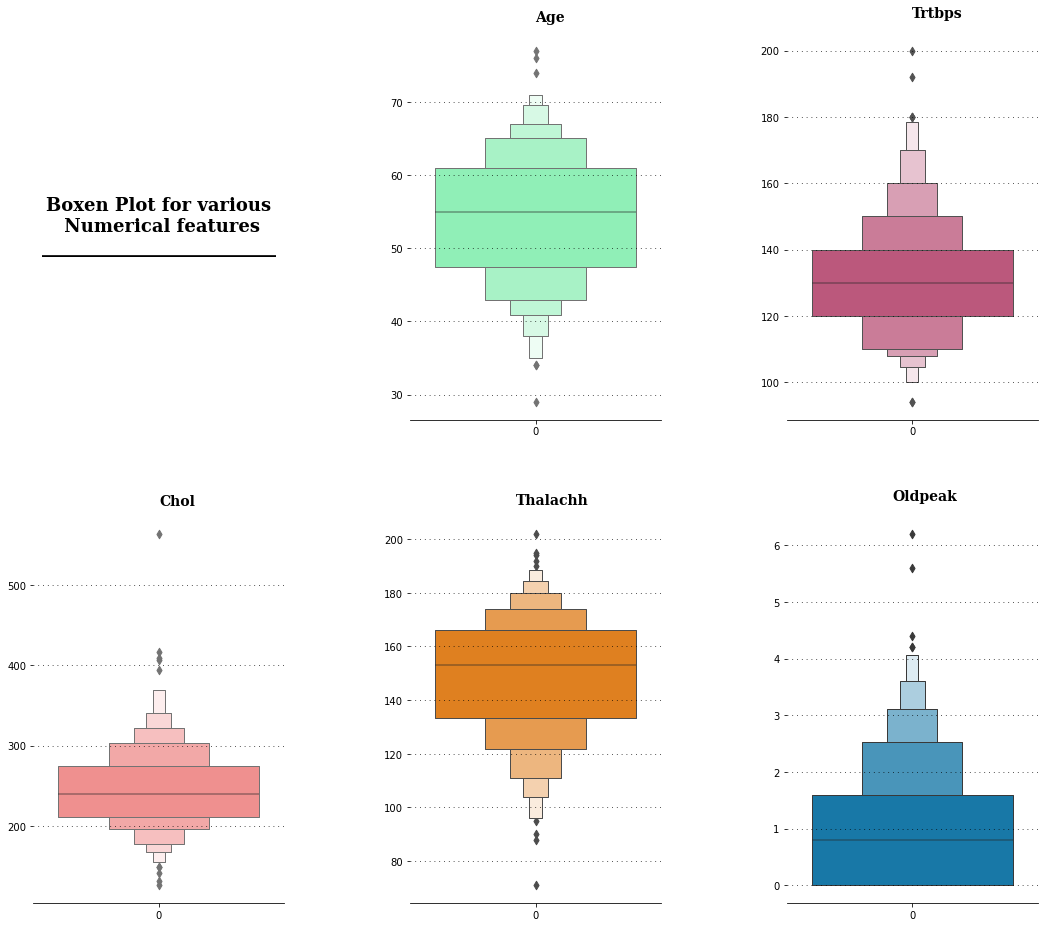

In [15]:
# Make Boxenplot for all numerical cols

#Create a figure
fig = plt.figure(figsize= (18,16))

# Create gridspec on the Fig
gs = fig.add_gridspec(2,3)

# Adding a GridSpec.update for the width and height spaces
gs.update(wspace = 0.5, hspace = 0.25)

# Adding the subplot axes on the grid
ax0 = fig.add_subplot(gs[0,0]) 
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

# Plot title
ax0.spines['bottom'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5, 'Boxen Plot for various\n Numerical features\n__________________________',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 18, fontweight = 'bold',
        fontfamily = 'serif')

# Age Boxenplot
ax1.text(0, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1, data=df['age'], palette='rainbow')
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps Boxenplot
ax2.text(0, 210, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2, data=df['trtbps'], palette='plasma')
ax2.set_xlabel("")
ax2.set_ylabel

# Chol Boxenplot
ax3.text(0, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3, data=df['chol'], palette='spring')
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh Boxenplot
ax4.text(-0.08, 213, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4, data=df['thalachh'], palette='autumn')
ax4.set_xlabel("")
ax4.set_ylabel("")

# Oldpeak Boxenplot
ax5.text(-0.08, 6.8, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5, data=df['oldpeak'], palette='winter')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Removing the spine from the graphs

for s in ['top', 'left','right']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

## Count plot for the target col

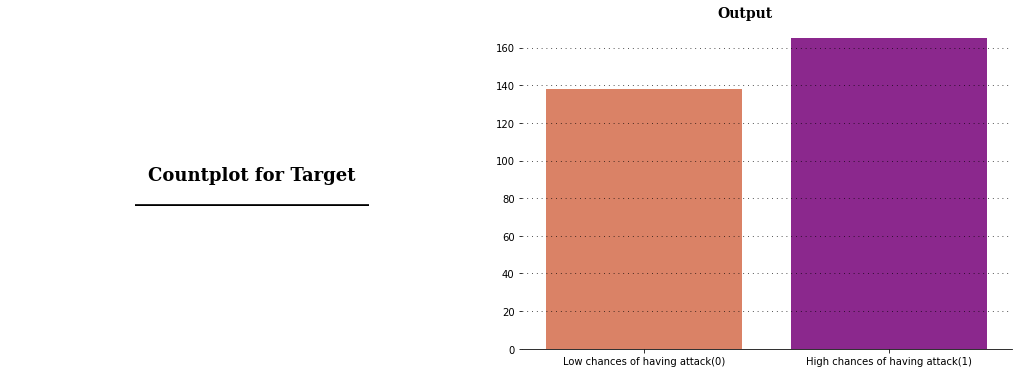

In [16]:
# Make countplot for all categorical cols

#Create a figure
fig = plt.figure(figsize= (18,6))

# Create gridspec on the Fig
gs = fig.add_gridspec(1,2)

# Adding a GridSpec.update for the width and height spaces
gs.update(wspace = 0.05, hspace = 0.25)

# Adding the subplot axes on the grid
ax0 = fig.add_subplot(gs[0,0]) 
ax1 = fig.add_subplot(gs[0,1])

# Plot title
ax0.spines['bottom'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5, 'Countplot for Target\n__________________________',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 18, fontweight = 'bold',
        fontfamily = 'serif')

# Sex countplot
ax1.text(0.3, 176, 'Output', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x='output', palette='plasma_r')
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(['Low chances of having attack(0)', 'High chances of having attack(1)'])

# Removing spine from ax1
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)

## Bivariate Analysis

In [17]:
df_corr = df[(Numerical_col)].corr()

df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


<AxesSubplot:>

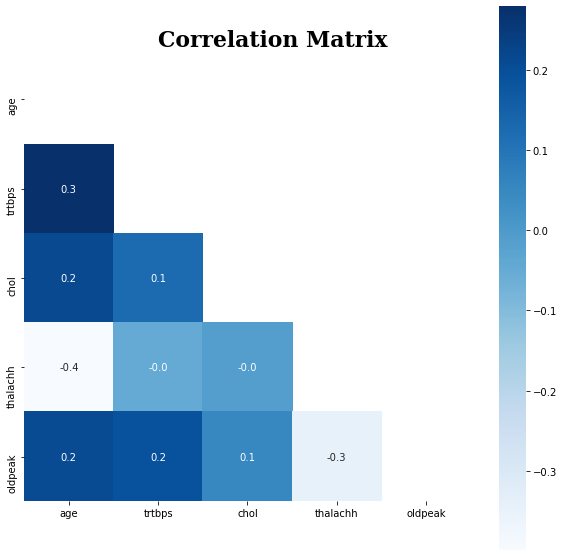

In [18]:
# For definite visibility, create a figure and axis
fig = plt.figure(figsize = (10,10))
gs = fig.add_gridspec(1,1)

ax0 = fig.add_subplot(gs[0,0])
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")

mask = np.triu(df_corr)
sns.heatmap(df_corr, ax=ax0, cmap = 'Blues', fmt = '.1f', annot = True, square = True, mask = mask)

## Distribution of Numerical features according to Target feature.

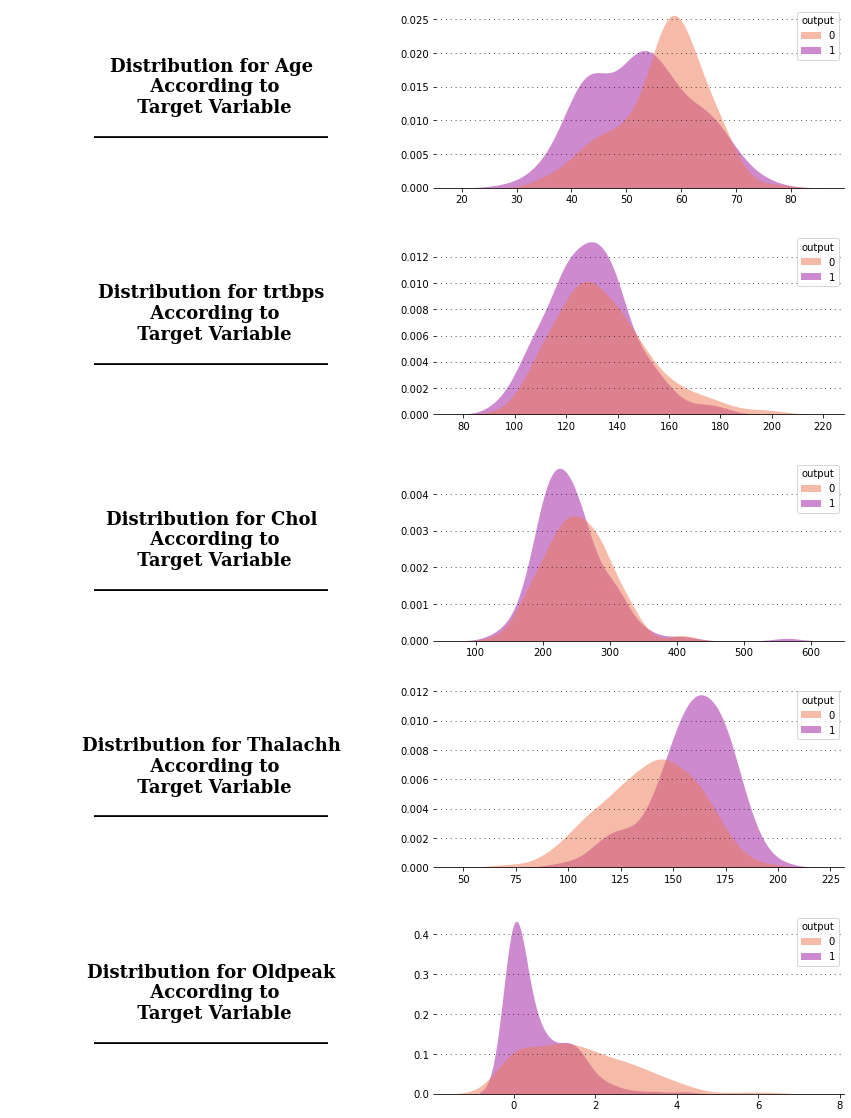

In [37]:
# Set the figure
fig = plt.figure(figsize =(15,20))

# Set the gridspec
gs = fig.add_gridspec(5,2)

gs.update(wspace = 0.05, hspace = 0.25)

#Add the axes
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

# Title axis for age and output
ax0.spines['bottom'].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5, 'Distribution for Age\n According to\n Target Variable\n__________________________',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 18, fontweight = 'bold',
        fontfamily = 'serif')

# Age KDE
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age', palette='plasma_r', hue = 'output', fill = True, alpha = .5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Title axis for trtbps and output
ax2.spines['bottom'].set_visible(False)
ax2.tick_params(left=False, bottom=False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.text(0.5,0.5, 'Distribution for trtbps\n According to\n Target Variable\n__________________________',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 18, fontweight = 'bold',
        fontfamily = 'serif')

# Trtbps KDE
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trtbps', palette='plasma_r', hue = 'output', fill = True, alpha = .5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Title axis for chol and output
ax4.spines['bottom'].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5,0.5, 'Distribution for Chol\n According to\n Target Variable\n__________________________',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 18, fontweight = 'bold',
        fontfamily = 'serif')

# Chol KDE
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol', palette='plasma_r', hue = 'output', fill = True, alpha = .5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Title axis for thalachh and output
ax6.spines['bottom'].set_visible(False)
ax6.tick_params(left=False, bottom=False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.text(0.5,0.5, 'Distribution for Thalachh\n According to\n Target Variable\n__________________________',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 18, fontweight = 'bold',
        fontfamily = 'serif')

# Thalachh KDE
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thalachh', palette='plasma_r', hue = 'output', fill = True, alpha = .5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Title axis for oldpeak and output
ax8.spines['bottom'].set_visible(False)
ax8.tick_params(left=False, bottom=False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.text(0.5,0.5, 'Distribution for Oldpeak\n According to\n Target Variable\n__________________________',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 18, fontweight = 'bold',
        fontfamily = 'serif')

# Oldpeak KDE
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak', palette='plasma_r', hue = 'output', fill = True, alpha = .5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

# Remove spines for all axes
for s in ['top', 'left', 'right']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)
    ax9.spines[s].set_visible(False)

## Some other intuitive relation

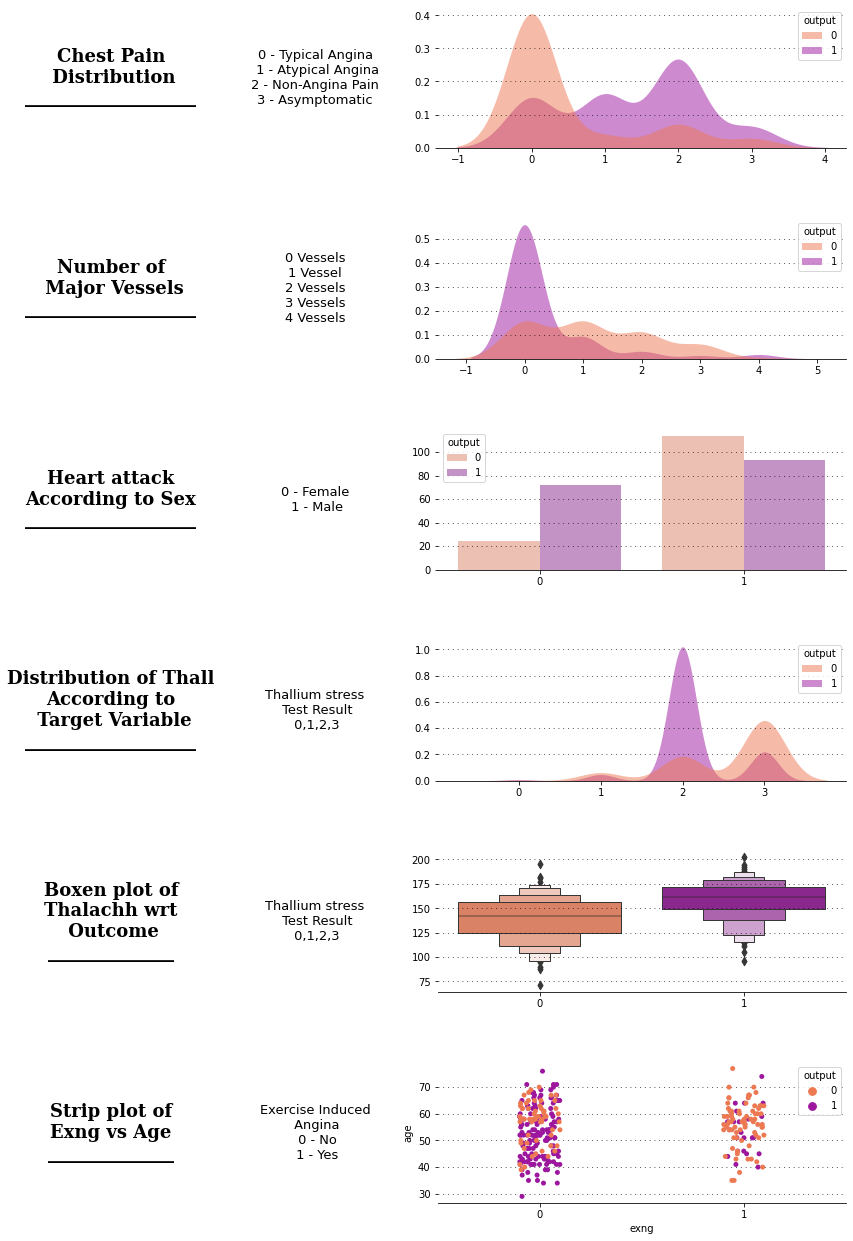

In [67]:
# Set the figure
fig = plt.figure(figsize =(15,22))

# Set the gridspec
gs = fig.add_gridspec(6,2)

gs.update(wspace = 0.05, hspace = 0.5)

#Add the axes
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

# Title axis for Chest Pain
ax0.spines['bottom'].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.25,0.5, 'Chest Pain\n Distribution\n___________________',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 18, fontweight = 'bold',
        fontfamily = 'serif')
ax0.text(0.75,0.5,'0 - Typical Angina\n 1 - Atypical Angina\n2 - Non-Angina Pain\n3 - Asymptomatic',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 13, fontweight = 'light')

# Chest Pain KDE
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='cp', palette='plasma_r', hue = 'output', fill = True, alpha = .5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Title axis for Chest Pain
ax2.spines['bottom'].set_visible(False)
ax2.tick_params(left=False, bottom=False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.text(0.25,0.5, 'Number of\n Major Vessels\n___________________',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 18, fontweight = 'bold',
        fontfamily = 'serif')
ax2.text(0.75,0.5,'0 Vessels\n1 Vessel\n2 Vessels\n3 Vessels\n4 Vessels',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 13, fontweight = 'light')

# Chest Pain KDE
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='caa', palette='plasma_r', hue = 'output', fill = True, alpha = .5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Title axis for Sex
ax4.spines['bottom'].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.25,0.5, 'Heart attack\nAccording to Sex\n___________________',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 18, fontweight = 'bold',
        fontfamily = 'serif')
ax4.text(0.75,0.5,'0 - Female\n 1 - Male',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 13, fontweight = 'light')

# Sex KDE
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5, data=df, x='sex', palette='plasma_r', hue = 'output', fill = True, alpha = .5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Title axis for Thall
ax6.spines['bottom'].set_visible(False)
ax6.tick_params(left=False, bottom=False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.text(0.25,0.5, 'Distribution of Thall\nAccording to\n Target Variable\n___________________',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 18, fontweight = 'bold',
        fontfamily = 'serif')
ax6.text(0.75,0.5,'Thallium stress\n Test Result\n 0,1,2,3',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 13, fontweight = 'light')

# Thall KDE
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thall', palette='plasma_r', hue = 'output', fill = True, alpha = .5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Title axis for Thalachh
ax8.spines['bottom'].set_visible(False)
ax8.tick_params(left=False, bottom=False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.text(0.25,0.5, 'Boxen plot of\nThalachh wrt\n Outcome\n______________',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 18, fontweight = 'bold',
        fontfamily = 'serif')
ax8.text(0.75,0.5,'Thallium stress\n Test Result\n 0,1,2,3',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 13, fontweight = 'light')

# Thalachh boxenplot
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=df,x='output',y='thalachh',palette='plasma_r')
ax9.set_xlabel("")
ax9.set_ylabel("")

# Title axis for Exng
ax10.spines['bottom'].set_visible(False)
ax10.tick_params(left=False, bottom=False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.text(0.25,0.5, 'Strip plot of\nExng vs Age\n______________',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 18, fontweight = 'bold',
        fontfamily = 'serif')
ax10.text(0.75,0.5,'Exercise Induced\n Angina\n 0 - No\n 1 - Yes',
        horizontalalignment = 'center',
        verticalalignment='center',
        fontsize = 13, fontweight = 'light')

# Exng stripplot
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=df,x='exng', y ='age', hue='output', palette='plasma_r')
ax11.set_xlabel("exng")
ax11.set_ylabel("age")

# Removing the spines

for s in ['top', 'left', 'right']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)
    ax9.spines[s].set_visible(False)
    ax10.spines[s].set_visible(False)
    ax11.spines[s].set_visible(False)

## Pairplot for the data

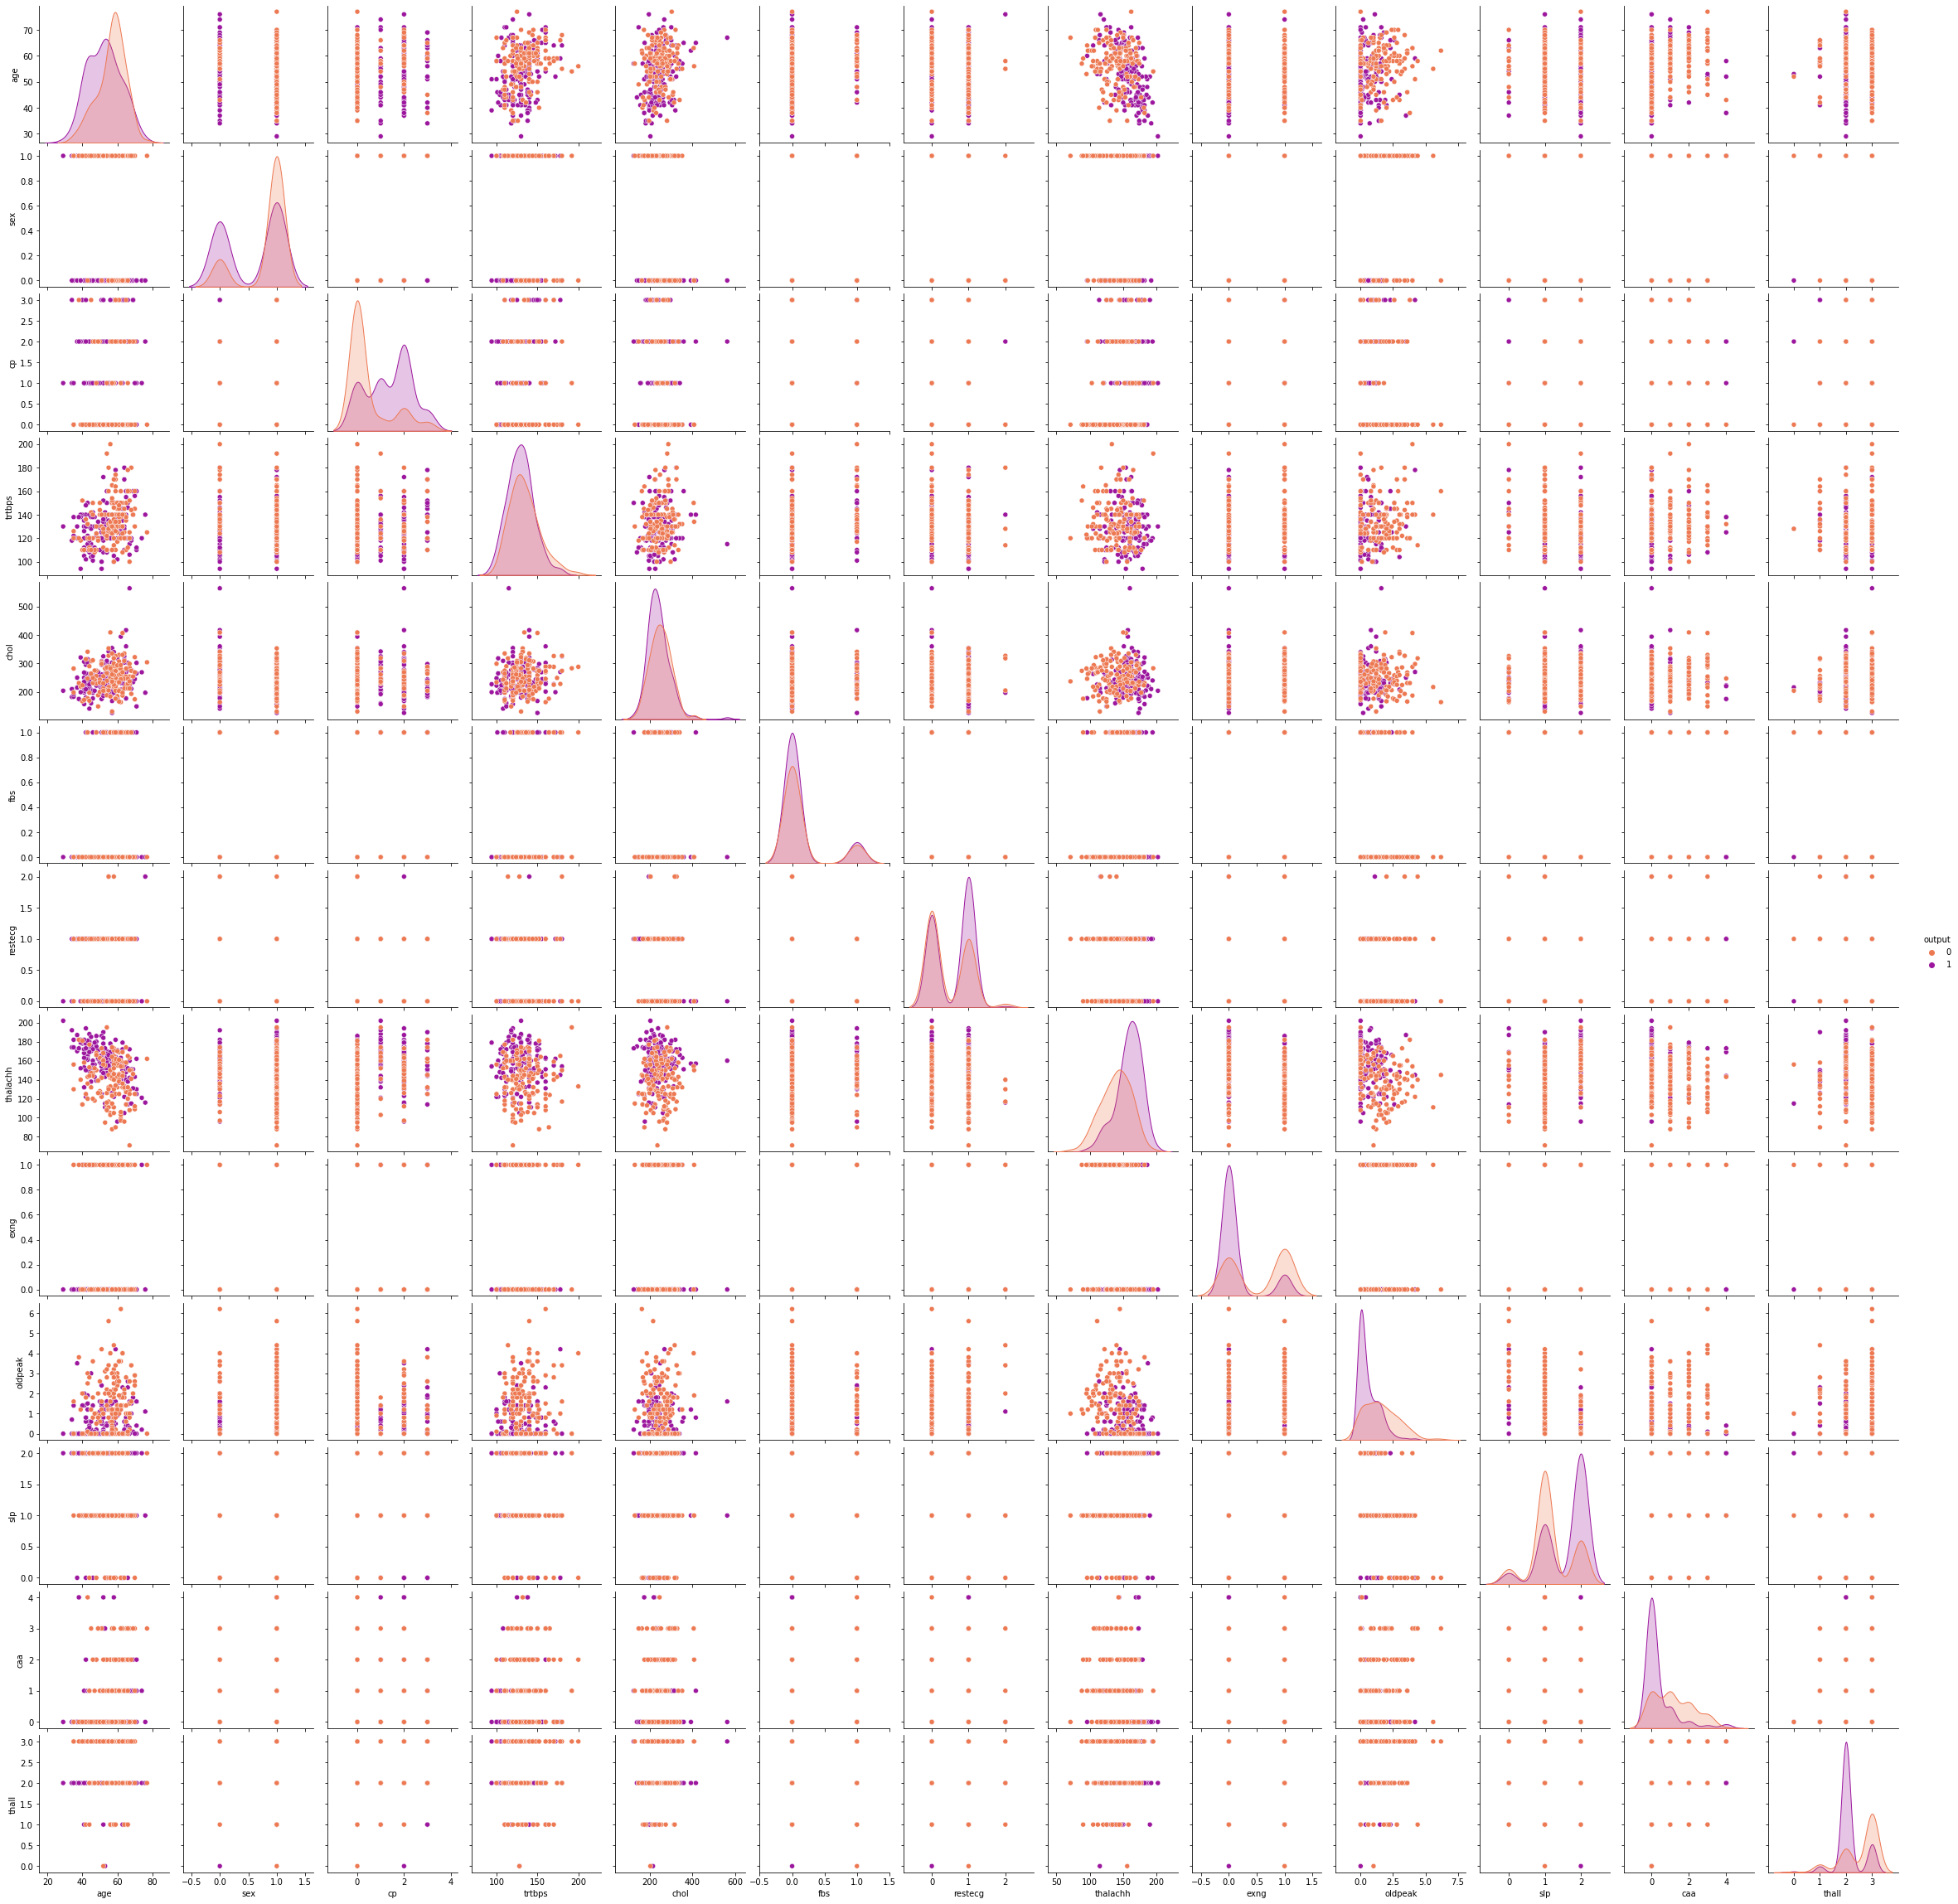

In [69]:
sns.pairplot(data = df, palette = 'plasma_r', hue='output')